# MACHINE LEARING logistic regression


In [1]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------- -------------------------- 2.9/8.7 MB 17.4 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 20.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ------- -------------------------------- 6.8/38.5 MB 35.8 MB/s eta 0:00:01
   ----------- ---------------------------- 11.5/38.5 MB 29.3 MB/s eta 0:00:01
   --------------- ------------------------ 14.9/38.5 MB 24.1 MB/s eta 0:00:01
   -------------------- ------------------- 19.4/38.5 MB 23.4 MB/s eta 0:00:01
   ----------------------- ---------------- 23.1/38.5 MB 22.5 MB/s eta 0:00:01
   ----------------------------- ---------- 28.3/38.5 MB 22.7 MB/s eta 0:00:01
   -------------------------------- ------- 31.7/38.5 MB 22.3 MB/s eta 0:00:01
   ------------------------------------ --- 35.4/38.5 MB 21.5 MB/s eta 0:00:01


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split 


In [3]:
df = pd.read_csv('candy-data.csv')

In [4]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [5]:
df.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
80    False
81    False
82    False
83    False
84    False
Length: 85, dtype: bool

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (127, 6)


In [7]:
df = df.drop_duplicates()

In [8]:
df.count()

competitorname      85
chocolate           85
fruity              85
caramel             85
peanutyalmondy      85
nougat              85
crispedricewafer    85
hard                85
bar                 85
pluribus            85
sugarpercent        85
pricepercent        85
winpercent          85
dtype: int64

In [9]:
print(df.isnull().sum()) 

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


In [10]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [11]:
df=df.drop(['competitorname'],axis=1)

In [12]:
df

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [13]:
# split data into train test sets
from sklearn.model_selection import train_test_split
trainingSet, testSet =train_test_split(df, test_size= 0.2)

In [14]:
#creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

In [16]:
X_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y_train = train_df["chocolate"]
X_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y_test = test_df["chocolate"]

In [17]:
print(X_test)

    fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  bar  \
0        0        1               0       0                 1     0    1   
37       0        1               0       1                 0     0    1   
44       1        0               0       0                 0     0    0   
30       1        0               0       0                 0     1    0   
56       0        1               0       0                 0     0    0   
6        0        1               1       1                 0     0    1   
65       0        1               1       0                 1     0    1   
32       0        0               1       0                 0     0    0   
36       0        1               0       1                 0     0    1   
17       1        0               0       0                 0     1    0   
34       1        0               0       0                 0     0    0   
58       1        0               0       0                 0     1    0   
14       1  

In [19]:
print(X_train)

    fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  bar  \
50       1        0               0       0                 0     0    0   
71       0        1               0       0                 0     0    0   
43       0        0               0       0                 1     0    1   
83       0        1               0       0                 0     1    0   
79       0        1               0       0                 1     0    1   
..     ...      ...             ...     ...               ...   ...  ...   
69       1        0               0       0                 0     1    0   
68       1        0               0       0                 0     0    0   
55       1        0               0       0                 0     1    0   
28       0        0               0       0                 1     0    1   
57       0        0               0       0                 0     1    0   

    pluribus  sugarpercent  pricepercent  winpercent  
50         1         0.581      

In [21]:
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_37624\1365858570.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="chocolate", data=train_df,palette ='Blues_d')


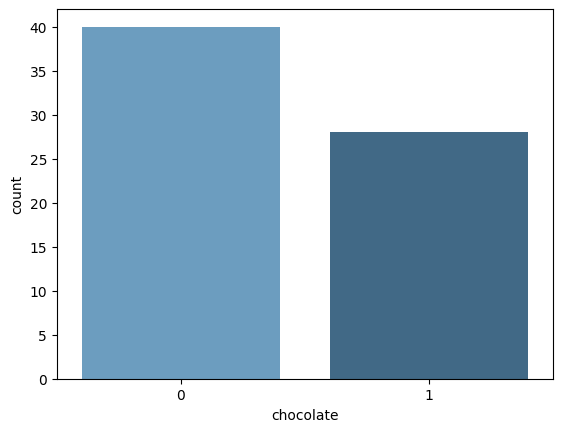

<Figure size 640x480 with 0 Axes>

In [22]:
sns.countplot(x="chocolate", data=train_df,palette ='Blues_d')
plt.show()
plt.savefig('count_plot')

In [38]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.25 )

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.linear_model  import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train.values.reshape(-1,1),Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
y_pred = lr.predict(X_test.values.reshape(-1,1))

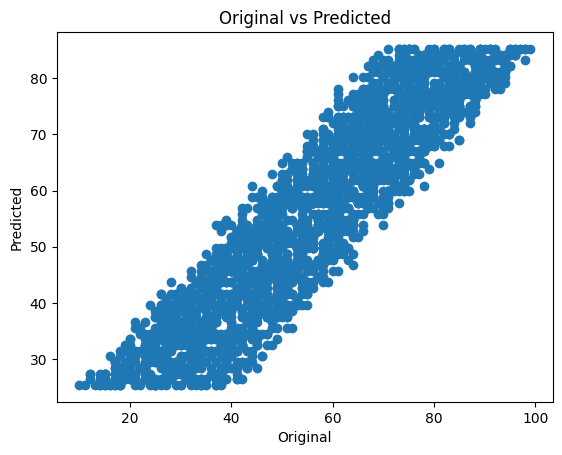

In [50]:
plt.Figure(figsize=(15,10))
plt.scatter(Y_test,y_pred)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Original vs Predicted')
plt.show()